<a href="https://colab.research.google.com/github/Karishma-Kuria/CMPE-255-Dimensionality-Reduction-Techniques/blob/main/DimensionalityReduction_For_Tabular_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset_path = 'https://github.com/Karishma-Kuria/CMPE-255-Dimensionality-Reduction-Techniques/blob/main/Wine.csv?raw=true'
columns = ['class','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
    'proanthocyanins', 'color_intensity', 'hue',
    'od280/od315_of_diluted_wines', 'proline']
wine_dataset = pd.read_csv(dataset_path, names=columns, header=0)
wine_ds = wine_dataset.copy()

# Prints top 10 rows of dataset
wine_ds.head()


,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
#print(wine_ds.target_names)

#iris = datasets.load_wine()
#print(iris.target_names)

In [ ]:
wine_ds.describe

In [28]:
wine_ds.shape

(177, 14)

# **1. Dimensionality Reduction using PCA**

## **Calculating Correlation**

In [5]:
wine_ds.corr()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
alcohol,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
malic_acid,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
ash,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
alcalinity_of_ash,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
magnesium,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
total_phenols,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
flavanoids,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
nonflavanoid_phenols,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
proanthocyanins,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


### The above table shows the correlation between all the pairs. If the correlation is positive, it means if one variable increases the other variable also increases. Negative means if one variable decreases the other also decreases. 

In [ ]:
X_variables = wine_ds.iloc[:,1:14]
X_variables

In [ ]:

y_variable = wine_ds.iloc[:,13]
y_variable

In [7]:
wine_ds.shape

(177, 14)

## **Visualizing the Correlation**

In [ ]:
correlation = wine_ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between various fearures of the dataset')

In [84]:
# I have dropped the last 2 columns
#ds_drop=hr_ds.drop(labels=['sales','salary'],axis=1)
#ds_drop.head()

## **Standarizing**
This process shifts the distribution of all the variables in the dataset to a mean of 0 and standard deviation of 1.

In [9]:
# Used the standard scaler method to convert the values into integers between -3 and +3
scaler = StandardScaler()
transformed_ds = scaler.fit_transform(X_variables)

## **Creating Covariance Matrix**

In [ ]:
covariance_matrix = np.cov(transformed_ds.T)
print("The Covariance Matrix is \n", covariance_matrix)

## **Plotting the Covariance between pairs.**

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(covariance_matrix, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')


## **Calculating the Eigen Values and Eigen Vectors.**

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eigen_vectors)
print('\nEigenvalues \n%s' %eigen_values)

## **Selecting Priciple component:**
### Now I have sorted the Eigen Values in descending order. The Eigen Vector with the least Eigen Value will hold the least information about the distribution and can dropped to reduce the dimensionality. 

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

## **Applying PCA**

In [ ]:
pca = PCA()
pca = pca.fit(transformed_ds)
pca_explained_variance = pca.explained_variance_ratio_
pca_explained_variance

## **Plotting variance and Principle Components**

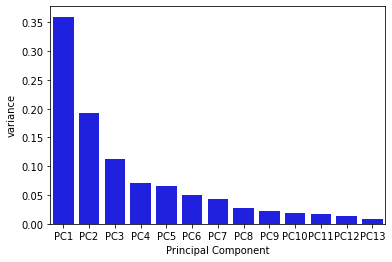

In [16]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4', 'PC5','PC6','PC7',
                                    'PC8','PC9','PC10','PC11', 'PC12','PC13']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

### The above bar graph shows that the first 2 variables holds the maximum information about the distribution as compared to the rest of the variables.

Text(0, 0.5, 'Cumulative explained variance')

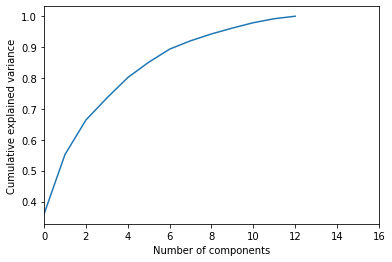

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,16,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### From the above graph its clear that, 90% variance is covered till the 12th variable and hence we can drop the last feature.

<Figure size 576x432 with 0 Axes>

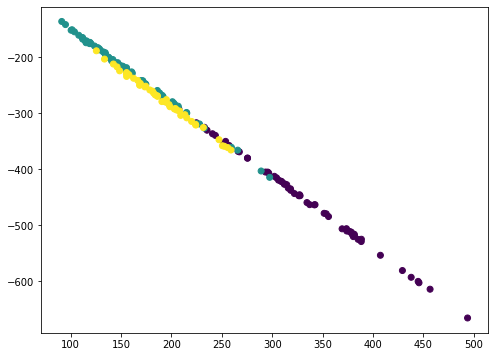

In [18]:
pca_2 = PCA(n_components = 2 )
pca_2 = pca_2.fit(transformed_ds)
pca_2d = pca_2.transform(X_variables)
plt.figure(figsize=(8,6))
wine_ds['class'] = wine_ds['class'].replace({0:0, 1:1})

plt.figure(figsize=(8,6))
plt.scatter(pca_2d[:,0], pca_2d[:,1],c=wine_ds['class'])
plt.show()

In [19]:
# Creating a dataframe featuring the two Principal components that we acquired through PCA.
PCA_dataset1 = pd.DataFrame(data = pca_2d, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,314.440340,-427.103904
1,351.561659,-478.283964
2,437.940024,-592.533107
3,224.783342,-316.499425
4,429.240887,-580.471093


In [70]:
# Extracting the two features from above in order to add them to the dataframe.
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

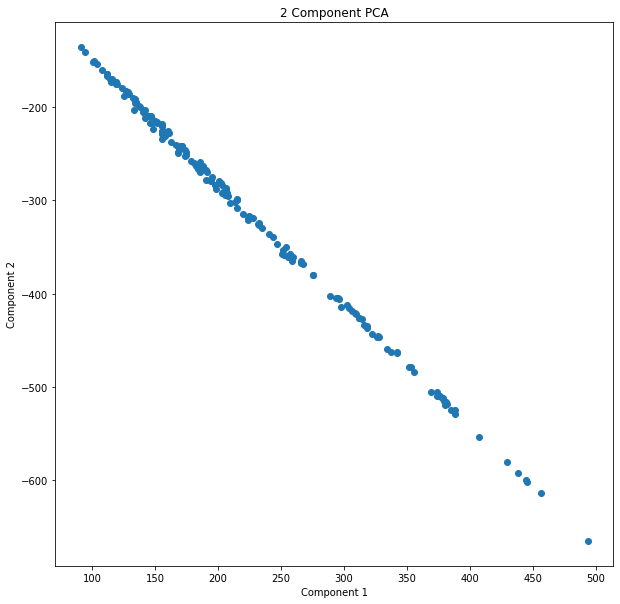

In [20]:
# Visualizing the effects of the Principal Component Analysis.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

In [21]:
pca_2d.shape

(177, 2)

# **2.Dimensionality Reduction using SVD**

In [79]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Using the same dataset 
# Prints top 10 rows of dataset
wine_ds.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,65,49,18,1,21,68,91,9,31,56,50,102,92
1,0,63,71,62,31,22,73,114,13,96,82,48,86,101
2,0,120,59,48,20,33,95,121,7,84,108,30,104,116
3,0,67,81,74,44,37,73,89,20,66,53,49,73,66
4,0,115,47,45,10,32,89,119,17,75,96,50,68,115


In [49]:
wine_ds.shape

(177, 14)

### Here I have invoked LabelEncoder and applied it to all the columns in the dataset. This will convert all categorical columns into numerical columns using one-hot encoding technique.

In [66]:
encoder = LabelEncoder()
for col in wine_ds.columns:
    wine_ds[col] = encoder.fit_transform(wine_ds[col])

### Now I have checked the converted numerical columns in dataset

In [ ]:
wine_ds.head()

### Here I have divided the dataset into X-variable and Y-variable and then normalized both.

In [70]:
X_variables = wine_ds.iloc[:,1:10]
y_label = wine_ds.iloc[:, 0]

In [68]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

### Applied SVD, here u and v are singular vectors and s is singular value.

In [56]:
u, s, v = np.linalg.svd(X_features, full_matrices=True)

In [57]:
u.shape

(177, 177)

In [58]:
s.shape

(9,)

In [59]:
v.shape

(9, 9)

### Here I have analyzed and plotted the variance explained by each singular vector in a bsr graph.

Text(0, 0.5, 'Percent of the variance explained')

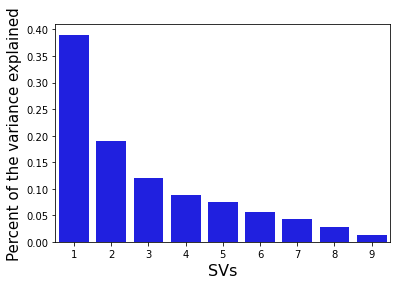

In [71]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

### Creating the new dataframe which contains the 2 singular vectors and the metadata.

In [72]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=wine_ds["class"].tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

,Class,SV1,SV2
0,0,-0.063013,-0.078817
1,0,-0.079689,0.061589
2,0,-0.135112,0.072540
3,0,-0.034945,0.140693
4,0,-0.119662,0.049405


### Plotted the variance explained by bith the Singular vector components against the target feature.

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('SVD')
sns.scatterplot(x=svd_df['SV1'], y=svd_df['SV2'],hue=svd_df["Class"],
                palette=["blue","red","orange"])
plt.xlabel('SV 1: {0}%'.format(variance_explained[0]*100), fontsize=15)
plt.ylabel('SV 2: {0}%'.format(variance_explained[1]*100), fontsize=15)

# **3. Dimensionality Reduction Using LLE**

### I have used the same Wine dataset for LLE

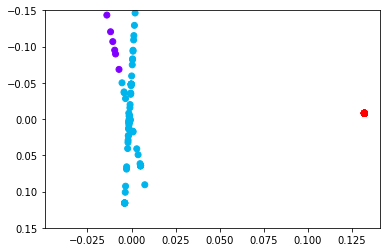

In [66]:
from sklearn.manifold import LocallyLinearEmbedding
# here I have set the number of components to be derived as 2 
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_transformed=lle.fit_transform(wine_ds)
fig, ax = plt.subplots()
colorize = dict(c=X_transformed[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

# **4. Dimensionality reduction T-SNE Technique**

In [67]:
# Implementing t-SNE.
from sklearn.manifold import TSNE
# here I have set the number of components to be derived as 2 
# I have used the same wine dataset for this technique
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results1 = tsne.fit_transform(X_features)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.534325
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.529057
[t-SNE] KL divergence after 300 iterations: 0.574947


In [ ]:
tsne_results1

In [ ]:
# Creating a dataframe featuring the two principal components that we acquired through t-SNE.
tsne_dataset1 = pd.DataFrame(data = tsne_results1, columns = ['component1', 'component2'] )
tsne_dataset1.head()

In [ ]:
# Extracting the two features from above in order to add them to the dataframe.
tsne_component1 = tsne_dataset1['component1']
tsne_component2 = tsne_dataset1['component2']
# Visualizing the effects of the T-distributed Stochastic Neighbour Embedding.
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component TSNE')
plt.scatter(tsne_component1, tsne_component2)

# **5. Isometric mapping for Dimensionality Reduction**

### It is a non linear dimensionality reduction technique. The steps involved in it are as follow
1. First the nearest neighbours of each point and create a weighted graph by connecting each point to its nearest neighbour. The nodes in the graph are the data points and the weights are the distance between them.
2. Now redefine the distance between the points to be the lenghth of the shortest path between 2 points in the neighbourhood graph.
3. Lastly Apply MDS to the newly created distance matrix.

In [ ]:
# Using the same Wine dataset
from sklearn import datasets
from sklearn import manifold
wine = datasets.load_wine()

# input features
print(wine.feature_names)

In [ ]:
# output features
print(wine.target_names)

Assigning Input (X) and Output (Y) variables
Let's assign the all input variables to X and the output variable (class label) to Y

In [72]:

X = wine.data
Y = wine.target

Determining the dimensions

In [ ]:
X.shape

In [ ]:
Y.shape

In [31]:
# Appying ISOMap on the dataset for 2 components, this will result in 
# a dataset with 2 features.
iso_map = manifold.Isomap(n_neighbors=6, n_components=2)
iso_map.fit(X)
manifold_iso_map_data = iso_map.transform(X)

In [ ]:
# Dimensions are reduced from 13 to 2
manifold_iso_map_data.shape

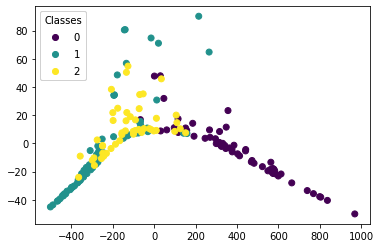

In [34]:
# Plotting the graph against the target variable which is Class of wine in our case
fig, ax = plt.subplots()
scatter = ax.scatter(manifold_iso_map_data[:,0],manifold_iso_map_data[:,1], c=Y,)
# produce a legend with the unique colors from the scatter
isomap = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(isomap)


# **6. Uniform Manifold Approximation and Projection (UMAP) for Dimensionality Reduction**

In [ ]:
# I have used the same Wine dataset for UMAP
# Implementing UMAP.
# installing umap package
!pip install umap-learn


In [52]:
import umap
# This is converting the data into low dimension 
embedding = umap.UMAP(n_components=2,n_neighbors=50,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)


The above embedding is the 2 dimension representation of the dataset.

In [53]:
component1_umap = embedding[:,0]
component2_umap = embedding[:,1]

<Figure size 432x288 with 0 Axes>

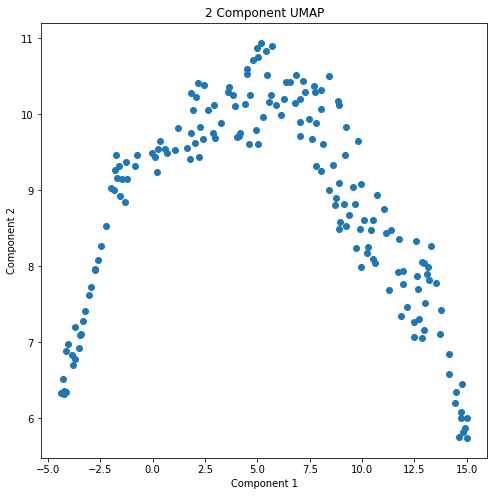

In [62]:
# Visualized the effects of the Uniform Manifold Approximation and Projection.
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component UMAP')
plt.scatter(component1_umap, component2_umap)

The above graph shows the 2 components which are the result of the dimensionality reduction.



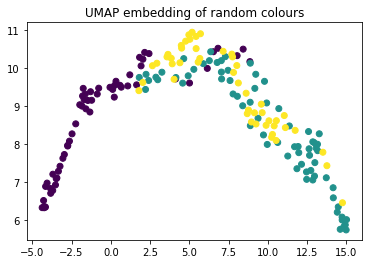

In [65]:
# Plotting the points in 2-d with respect to target variable which is wine Class
plt.scatter(embedding[:,0], embedding[:,1], c=Y)
plt.title('UMAP embedding of random colours');

In the above graph the data is placed in 2 dimensional space, i-e the points that were close in 4-dimensional space are kept close together. 